In [1]:
import pandas as pd
import fastai
from fastai.text import TextList, TokenizeProcessor, NumericalizeProcessor, TextLMDataBunch, language_model_learner
from fastai.datasets import URLs

%matplotlib inline

In [40]:
df = pd.read_csv(".\data\quotes_all.csv", delimiter=";", header=None, names=["quote", "author", "topic"])

### Remove the duplicated quotes

In [3]:
len(df.quote.unique())

61071

In [4]:
df.shape

(75966, 3)

In [5]:
df.drop_duplicates(subset="quote", inplace=True)

In [6]:
df.shape

(61071, 3)

In [7]:
df.head()

,quote,author,topic
0,Age is an issue of mind over matter. If you do...,Mark Twain,age
1,"Anyone who stops learning is old, whether at t...",Henry Ford,age
2,Wrinkles should merely indicate where smiles h...,Mark Twain,age
3,True terror is to wake up one morning and disc...,Kurt Vonnegut,age
4,A diplomat is a man who always remembers a wom...,Robert Frost,age


In [8]:
df = df[["quote", "author"]]

In [9]:
df.head()

,quote,author
0,Age is an issue of mind over matter. If you do...,Mark Twain
1,"Anyone who stops learning is old, whether at t...",Henry Ford
2,Wrinkles should merely indicate where smiles h...,Mark Twain
3,True terror is to wake up one morning and disc...,Kurt Vonnegut
4,A diplomat is a man who always remembers a wom...,Robert Frost


In [10]:
data_lm = (TextList.from_df(df, processor=[TokenizeProcessor(), NumericalizeProcessor(max_vocab=60000, min_freq=5)])
            .random_split_by_pct(0.2)
            .label_for_lm()           
            .databunch(bs=64))

In [11]:
data_lm.save()

In [12]:
data = TextLMDataBunch.load(".\\", bs=64)

In [13]:
data

TextLMDataBunch;

Train: LabelList
y: LMLabel (48857 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: LMTextList (48857 items)
[Text xxbos xxmaj anyone who stops learning is old , whether at twenty or eighty . xxmaj anyone who keeps learning stays young . xxmaj the greatest thing in life is to keep your mind young ., Text xxbos xxmaj wrinkles should merely indicate where smiles have been ., Text xxbos xxmaj true terror is to wake up one morning and discover that your high school class is running the country ., Text xxbos a xxunk is a man who always remembers a woman 's birthday but never remembers her age ., Text xxbos xxmaj as i grow older , i pay less attention to what men say . i just watch what they do .]...
Path: .;

Valid: LabelList
y: LMLabel (12214 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: LMTextList (12214 items)
[Text xxbos xxmaj the technology used to xxunk if vehicles are carrying xxunk material is so 

In [31]:
data.show_batch()

idx,text
0,xxbos xxmaj beauty and the xxmaj beast became the first animated feature ever nominated for best picture . xxbos xxmaj the one thing that the xxmaj president can do is to establish a real energy independence plan . xxmaj we have all the xxunk we need right here in this country to establish energy independence if we had the leadership . xxbos xxmaj anger is an
1,"and run , and i love to play soccer . xxbos xxmaj research is of considerable importance in certain fields , such as science and history . xxbos xxmaj morality without religion is only a kind of dead xxunk - an endeavor to find our place on a xxunk sea by xxunk the distance we have run , but without any observation of the heavenly bodies"
2,"of the earth . xxbos xxmaj the secret to true happiness is a combination of low expectations and xxunk . xxbos xxmaj you may not be able to read a doctor 's xxunk and prescription , but you 'll notice his bills are xxunk xxunk . xxbos xxmaj usually , if you smile at them and show some interest in the toy , they will give"
3,"'ll tell you the best thing about me . i 'm some guy 's dad i 'm some little xxunk 's dad . xxmaj when i die , if they say i was xxmaj xxunk 's husband and xxmaj xxunk xxmaj john and xxmaj xxunk xxmaj kate 's father , boy , that 's enough for me to be remembered by . xxmaj that 's more"
4,"yet both needs are important to a marriage . xxbos xxmaj an xxmaj englishman teaching an xxmaj american about food is like the blind leading the one - xxunk . xxbos xxmaj in principle if i could not have a home i would n't . xxmaj but not having a home would be too difficult xxunk , going from hotel to hotel , the gap of"


In [22]:
learn = language_model_learner(data, pretrained_model=URLs.WT103_1, drop_mult=0.3)

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


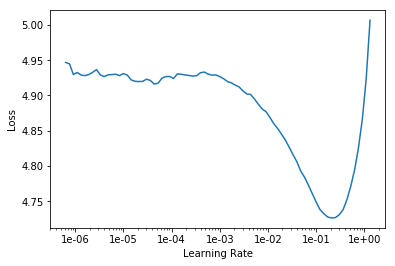

In [24]:
learn.recorder.plot(skip_end=10)

In [25]:
learn.fit_one_cycle(1, 1e-01, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.440338,4.212595,0.258209


In [93]:
learn.unfreeze()

In [94]:
learn.fit_one_cycle(5, 1e-03, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.063072,4.029286,0.276309
2,3.921026,3.902763,0.290380
3,3.782968,3.852040,0.296799
4,3.681372,3.833124,0.300034
5,3.618724,3.834989,0.300218


In [95]:
learn.save('fine_tuned')

In [26]:
learn.predict("ghost", 10, temperature=0.8)

'ghost islam songwriter merciful barely circumstance overall lessons achievements 22 frozen'

In [38]:
print(learn.predict("s", 20, temperature=0.9))

s xxpad adds mediocrity monroe creep divisions daughter established misuse integrate dynamic airplanes unit regular celebrities is inferior neglect activities recognizing


In [33]:
print(learn.predict("life is", 10, temperature=0.9))

life is says san norm ethnicity diamond somewhere volumes moments wisconsin smile


In [34]:
print(learn.predict("life is", 10, temperature=0.9))

life is launched slight composer onto crop toward isolated bullet buys flower


In [35]:
print(learn.predict("life is", 10, temperature=0.9))

life is curtains function firm favors thanksgiving ambassador involved compass actress resisted


In [108]:
learn.predict("ghost", 10, temperature=0.8)

'ghost exhaust directions relevant carolina cautious gives employee faith roll skill'

In [ ]:
learn.export("quotes_generator.pkl")

## testing with only one topic

In [42]:
df2 = df[df["topic"] == "funny"]

In [43]:
data_lm = (TextList.from_df(df2, processor=[TokenizeProcessor(), NumericalizeProcessor(max_vocab=60000, min_freq=5)])
            .random_split_by_pct(0.2)
            .label_for_lm()           
            .databunch(bs=32))

In [44]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList
y: LMLabel (800 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: LMTextList (800 items)
[Text xxbos i believe that if life xxunk you xxunk , you should make xxunk ... xxmaj and try to find somebody xxunk life has xxunk them xxunk , and have a xxunk ., Text xxbos a word to the xxunk ai n't xxunk - it 's the xxunk xxunk that need the xxunk ., Text xxbos xxmaj xxunk every great man is a woman xxunk her xxunk ., Text xxbos i feel xxunk for people who do n't xxunk . xxmaj when they xxunk up in the xxunk , that 's as good as they 're going to feel all day ., Text xxbos xxmaj when you are xxunk a nice girl an xxunk seems like a second . xxmaj when you sit on a xxunk - xxunk xxunk a second seems like an xxunk . xxmaj that 's xxunk .]...
Path: .;

Valid: LabelList
y: LMLabel (199 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: LMTextList (199 items)
[Text x

In [47]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.3)

In [48]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


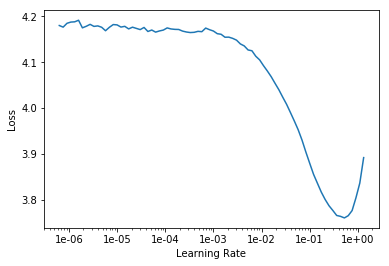

In [49]:
learn.recorder.plot(skip_end=10)

In [50]:
learn.fit_one_cycle(1, 1e-01, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.529677,3.000349,0.313707


In [ ]:
learn.unfreeze()

In [54]:
learn.predict("joke", 10, temperature=0.9)

'joke two should it if writing why sit once have find'

In [55]:
learn.predict("joke", 10, temperature=0.9)

'joke south can story yet away silly food doing end these'

In [56]:
learn.predict(" ", 10, temperature=0.9)

'  until film fun five come a tell happened sort anybody'

In [57]:
learn.predict("live", 10, temperature=0.9)

'live much dramatic this ai see hair we anybody so live'

In [58]:
learn.predict("joke", 10, temperature=0.9)

'joke are here human times house knew jokes everything along friends'

### the results are not good